<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Etude de santé publique 
</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd


#Importation du pack matplotbit
import matplotlib.pyplot as plt


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
# Spécifier les chemins des fichiers CSV
chemin_population = 'C:\\p4\\DAN-P4-FAO\\population.csv'
chemin_dispo_alimentaire = 'C:\\p4\\DAN-P4-FAO\\dispo_alimentaire.csv'
chemin_aide_alimentaire = 'C:\\p4\\DAN-P4-FAO\\aide_alimentaire.csv'
chemin_sous_nutrition = 'C:\\p4\\DAN-P4-FAO\\sous_nutrition.csv'

# Charger les jeux de données à partir des fichiers CSV
population = pd.read_csv(chemin_population)
dispo_alimentaire = pd.read_csv(chemin_dispo_alimentaire)
aide_alimentaire = pd.read_csv(chemin_aide_alimentaire)
sous_nutrition = pd.read_csv(chemin_sous_nutrition)



<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
# Obtenir les dimensions du jeu de données "population.csv"
nombre_de_lignes_population, nombre_de_colonnes_population = population.shape

# Afficher les dimensions du jeu de données "population.csv"
print("nombre de lignes : population.csv", nombre_de_lignes_population)
print("nombre de colonnes : population.csv", nombre_de_colonnes_population)

nombre de lignes : population.csv 1416
nombre de colonnes : population.csv 3


In [4]:
# Afficher la nature des données dans chacune des colonnes
nature_des_donnees = population.dtypes
print("Nombre de valeurs présentes dans chaque colonne :\n", nature_des_donnees)

# Afficher le nombre de valeurs présentes dans chacune des colonnes
nombre_de_valeurs_par_colonne = population.count()
nombre_de_valeurs_par_colonne.head()

Nombre de valeurs présentes dans chaque colonne :
 Zone       object
Année       int64
Valeur    float64
dtype: object


Zone      1416
Année     1416
Valeur    1416
dtype: int64

In [5]:
# Afficher les 5 premières lignes de la table
premieres_lignes = population.head()
print(premieres_lignes)

          Zone  Année     Valeur
0  Afghanistan   2013  32269.589
1  Afghanistan   2014  33370.794
2  Afghanistan   2015  34413.603
3  Afghanistan   2016  35383.032
4  Afghanistan   2017  36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population colonne 'Valeur' par 1000
population['Valeur'] = population['Valeur'] * 1000

# Afficher les 5 premières lignes après la multiplication
premieres_lignes_apres_multiplication = population.head()
print(premieres_lignes_apres_multiplication)


          Zone  Année      Valeur
0  Afghanistan   2013  32269589.0
1  Afghanistan   2014  33370794.0
2  Afghanistan   2015  34413603.0
3  Afghanistan   2016  35383032.0
4  Afghanistan   2017  36296113.0


In [7]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur': 'Population'}, inplace=True)
#Changement du nom du Royaume Uni et de la Tchéquie
population.loc[population['Zone']=="Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",'Zone']='Royaume-Uni'
population.loc[population['Zone']=="Tchéquie",'Zone']='Tchéquie(la)'

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
premieres_lignes_apres_changement_nom = population.head()
print(premieres_lignes_apres_changement_nom)

          Zone  Année  Population
0  Afghanistan   2013  32269589.0
1  Afghanistan   2014  33370794.0
2  Afghanistan   2015  34413603.0
3  Afghanistan   2016  35383032.0
4  Afghanistan   2017  36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
# Obtenir les dimensions du jeu de données "dispo_alimentaire.csv"
nombre_de_lignes_dispo_alimentaire, nombre_de_colonnes_dispo_alimentaire = dispo_alimentaire.shape
#Afficher les dimensions du dataset dispo_alimentaire
print("nombre de lignes :dispo_alimentaire.csv", nombre_de_lignes_dispo_alimentaire)
print("nombre de colonnes : dispo_alimentaire.csv", nombre_de_colonnes_dispo_alimentaire)


nombre de lignes :dispo_alimentaire.csv 15605
nombre de colonnes : dispo_alimentaire.csv 18


In [10]:
#Consulter le nombre de colonnes du jeu de données "dispo_alimentaire.csv"
nombre_de_colonnes=dispo_alimentaire.shape[1]
print("nombre de colonnes:",nombre_de_colonnes)


nombre de colonnes: 18


In [11]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire = dispo_alimentaire.fillna(0)

In [12]:
#multiplication de toutes les lignes contenant des tonnes en Kg
colonnes_tonnes_tokg = ['Aliments pour animaux', 'Disponibilité intérieure', 'Exportations - Quantité','Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
'Semences', 'Traitement', 'Variation de stock', 'Autres Utilisations']

for elt in colonnes_tonnes_tokg:
    dispo_alimentaire[elt] *= 1000000

In [13]:
#Affichage les 5 premières lignes des colonnes 10 à 18
dispo_alimentaire[colonnes_tonnes_tokg].head()


,Aliments pour animaux,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Autres Utilisations
0,0.0,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,0.0
1,0.0,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,0.0
2,0.0,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [14]:
#Afficher les dimensions du dataset
nombre_de_lignes_aide_alimentaire, nombre_de_colonnes_aide_alimentaire = aide_alimentaire.shape
print('nombre de lignes :aide_alimentaire.csv', nombre_de_lignes_aide_alimentaire)
print('nombre de colonnes : aide_alimentaire.csv', nombre_de_colonnes_aide_alimentaire)

nombre de lignes :aide_alimentaire.csv 1475
nombre de colonnes : aide_alimentaire.csv 4


In [15]:
# Consulter le nombre de colonnes
nombre_de_colonnes = aide_alimentaire.shape[1]
print('nombre de colonnes:', nombre_de_colonnes)


nombre de colonnes: 4


In [16]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()


,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [17]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'}, inplace=True)

In [18]:
# Définir la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
colonne_a_multiplier = 'Valeur'

# Multiplication des valeurs de la colonne par 1000
aide_alimentaire[colonne_a_multiplier] = aide_alimentaire[colonne_a_multiplier] * 1000

In [19]:
# Affichage des 5 premières lignes de la table
aide_alimentaire.head()


,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [20]:
#Afficher les dimensions du dataset
nombre_de_lignes_sous_nutrition, nombre_de_colonnes_sous_nutrition = sous_nutrition.shape
print('nombre de lignes :sous_nutrition.csv', nombre_de_lignes_sous_nutrition)
print('nombre de colonnes : sous_nutrition.csv', nombre_de_colonnes_sous_nutrition)


nombre de lignes :sous_nutrition.csv 1218
nombre de colonnes : sous_nutrition.csv 3


In [21]:
#Consulter le nombre de colonnes
nombre_de_colonnes = sous_nutrition.shape[1]
print('nombre de colonnes:', nombre_de_colonnes)

nombre de colonnes: 3


In [22]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [23]:
# Afficher les noms des colonnes du DataFrame sous_nutrition
sous_nutrition.columns



Index(['Zone', 'Année', 'Valeur'], dtype='object')

In [24]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={'Valeur':'Sous_nutrition'}, inplace=True)

In [25]:
# Conversion de la colonne 'Sous_nutrition' en numérique avec gestion des erreurs
sous_nutrition['Sous_nutrition'] = pd.to_numeric(sous_nutrition['Sous_nutrition'], errors='coerce')



In [26]:
# Remplacement des NaN par des zéros
sous_nutrition['Sous_nutrition'].fillna(0, inplace=True)


In [27]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['Sous_nutrition'] = sous_nutrition['Sous_nutrition'] * 1000000


In [28]:
# Afficher les 5 premières lignes de la table
sous_nutrition.head()



,Zone,Année,Sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [29]:
#Remplacer colonne année de sous nutrition en médiane des plages d'années
sous_nutrition['Année'].replace(['2012-2014','2013-2015','2014-2016','2015-2017','2016-2018','2017-2019'],['2013','2014','2015','2016','2017','2018'], inplace=True)
# Convertir la colonne "Année" en entier
sous_nutrition['Année'] = sous_nutrition['Année'].astype(int)


In [30]:
# Réaliser la jointure entre population et sous_nutrition
result = pd.merge(population, sous_nutrition, on=['Année','Zone'], how='inner')
# Filtrer les données pour l'année 2017
result_2017 = result[result['Année'] == 2017]


In [31]:
#Affichage du dataset
result_2017.head()


,Zone,Année,Population,Sous_nutrition
4,Afghanistan,2017,36296113.0,10500000.0
10,Afrique du Sud,2017,57009756.0,3100000.0
16,Albanie,2017,2884169.0,100000.0
22,Algérie,2017,41389189.0,1300000.0
28,Allemagne,2017,82658409.0,0.0


In [32]:
population_totale_2017 = result_2017['Population'].sum()


In [33]:
total_sous_nutrition_2017 = result_2017['Sous_nutrition'].sum()


In [34]:
# Calcul proportion de personnes en état de sous-nutrition en 2017
proportion_sous_nutrition_2017 = (total_sous_nutrition_2017 / population_totale_2017) * 100


In [35]:
# Afficher la proportion de sous-nutrition pour chaque entrée
print("Population totale en 2017 :", population_totale_2017)
print("Total de personnes en état de sous-nutrition en 2017:", total_sous_nutrition_2017)
print("Proportion de personnes en état de sous-nutrition en 2017:", proportion_sous_nutrition_2017)


Population totale en 2017 : 7466430284.0
Total de personnes en état de sous-nutrition en 2017: 535700000.0
Proportion de personnes en état de sous-nutrition en 2017: 7.174780713455061


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [36]:
#Combien mange en moyenne un être humain ? Source =https://www.fao.org/hunger/fr/
consommation_moyenne_kcal = 2500

In [37]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
dispo_al_pop = dispo_alimentaire.merge(population.loc[population['Année']==2017,['Zone','Population']], on='Zone', how='inner')


In [38]:
#Affichage du nouveau dataframe
dispo_al_pop.head()


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0


In [39]:
# Supprimez les espaces en début et en fin de nom de colonne
nom_colonne = 'Disponibilité alimentaire (Kcal/personne/jour)'.strip()

# Calcul des kilocalories (kcal) disponibles mondialement
dispo_al_pop['dispo_kcal'] = dispo_al_pop[nom_colonne] * dispo_al_pop['Population'] * 365


In [40]:
dispo_al_pop.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,36296113.0,6.624041e+10
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,5.299232e+10


In [41]:
# Calcul du total des calories disponibles mondialement
total_calories_disponibles = dispo_al_pop['dispo_kcal'].sum()


In [42]:
# Afficher le total des calories disponibles mondialement
print("Total des calories disponibles mondialement :", total_calories_disponibles)


Total des calories disponibles mondialement : 7718847056158440.0


In [43]:
#Calcul du nombre d'humains pouvant être nourris source=>
consommation_moyenne_kcal = 2500

# Calcul du nombre d'humains pouvant être nourris
nombre_humains_nourris = dispo_al_pop['dispo_kcal'].sum() / (consommation_moyenne_kcal*365)

# Afficher le DataFrame avec la nouvelle colonne 'nombre_humains_nourris'
proportion=nombre_humains_nourris*100/population.loc[population['Année']==2017,'Population'].sum()
print('total humain pouvant etre nourris: ',nombre_humains_nourris)
print('proportion: ',round(proportion,2),'%')

total humain pouvant etre nourris:  8459010472.5024
proportion:  112.07 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [44]:
#Transfert des données avec les végétaux dans un nouveau dataframe
# Sélectionner les lignes avec Origine = 'Végétale'
new_dataframe_vegetaux = dispo_al_pop.loc[dispo_al_pop['Origine'] == 'vegetale',:]

# Afficher le nouveau DataFrame avec les données relatives aux végétaux
new_dataframe_vegetaux.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,5.299232e+10
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000000.0,0.0,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.000000e+00


In [45]:
# Calcul du total des kilocalories disponibles pour les végétaux
total_kcal_vegetaux = new_dataframe_vegetaux['dispo_kcal'].sum()

# Afficher le total des kilocalories disponibles pour les végétaux
print("Total des kilocalories disponibles pour les végétaux :", total_kcal_vegetaux)


Total des kilocalories disponibles pour les végétaux : 6359679480534260.0


In [46]:
# Calcul du nombre d'humains pouvant être nourris avec les végétaux
nombre_humains_nourris_vegetaux = total_kcal_vegetaux / (consommation_moyenne_kcal*365)

# Afficher le nombre d'humains pouvant être nourris avec les végétaux
print("Nombre d'humains pouvant être nourris avec les végétaux :", nombre_humains_nourris_vegetaux)
proportion=nombre_humains_nourris_vegetaux*100/population.loc[population['Année']==2017,'Population'].sum()

print('proportion: ',round(proportion,2),'%')


Nombre d'humains pouvant être nourris avec les végétaux : 6969511759.4896
proportion:  92.33 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [47]:
#Calcul de la disponibilité totale
disponibilite_totale = dispo_al_pop['Disponibilité intérieure'].sum()

# Afficher la disponibilité totale des produits alimentaires
print("Disponibilité totale des produits alimentaires :", disponibilite_totale)


Disponibilité totale des produits alimentaires : 9829622000000.0


In [48]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
# Liste des noms de colonnes à afficher
colonnes_a_afficher = ['Aliments pour animaux', 'Pertes', 'Nourriture']

# Parcourir chaque nom de colonne et afficher les valeurs correspondantes
for colonne in colonnes_a_afficher:
    sum_colonne = round(dispo_al_pop[colonne].sum()/disponibilite_totale*100,2)
    print(f"Proportion {colonne} :", sum_colonne,'%')


Proportion Aliments pour animaux : 13.24 %
Proportion Pertes : 4.61 %
Proportion Nourriture : 49.51 %


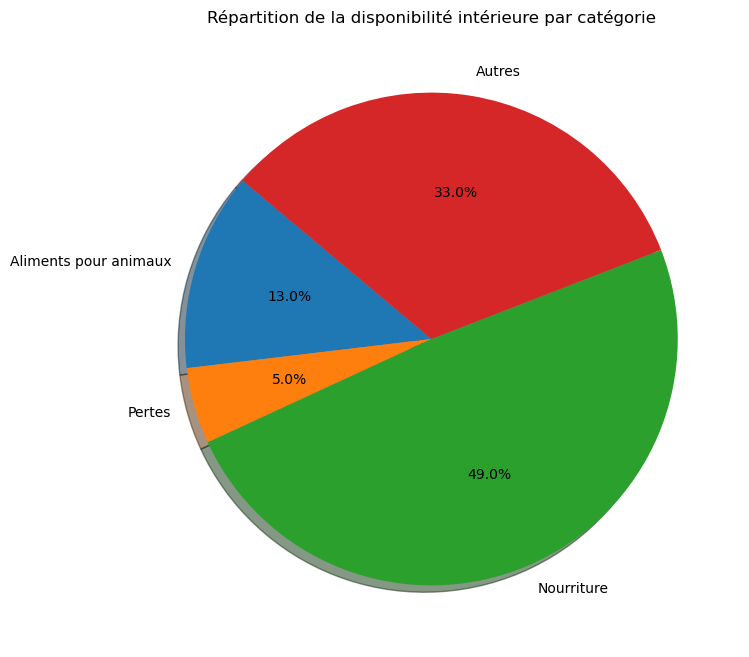

In [49]:
import matplotlib.pyplot as plt

# Les données de la répartition de la disponibilité intérieure par catégorie
categories = ['Aliments pour animaux', 'Pertes', 'Nourriture','Autres']
disponibilite_interieure = [13,5,49,33]  # Les pourcentages doivent totaliser 100%

# Créer le graphique camembert
plt.figure(figsize=(8, 8))
plt.pie(disponibilite_interieure, labels=categories, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Répartition de la disponibilité intérieure par catégorie')

# Afficher le graphique
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [50]:
# Obtenir la liste des noms de colonnes du DataFrame
liste_cereales = ["Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle",
                  "Avoine", "Millet", "Sorgho", "Céréales, Autres"]

# Afficher la liste des variables
print("colonnes utilisation céréales :", liste_cereales)


colonnes utilisation céréales : ['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres']


In [51]:
# Filtre pour sélectionner les lignes concernant les céréales
filtre_cereales =dispo_al_pop[ dispo_al_pop['Produit'].isin(liste_cereales)]


# Afficher le nouveau DataFrame avec les informations pour les céréales
filtre_cereales.head()


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0,36296113.0,1.813662e+13
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,36296113.0,0.000000e+00
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0,36296113.0,2.782097e+11
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0,36296113.0,3.974424e+10
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0,36296113.0,3.444501e+11


In [52]:

# Calculer la somme de la colonne 'Aliments pour animaux'
total_alimentation_animale = filtre_cereales['Aliments pour animaux'].sum()

# Afficher le total
print("Total de l'alimentation animale:", total_alimentation_animale)


Total de l'alimentation animale: 870964000000.0


In [53]:
total_nourriture = filtre_cereales['Disponibilité intérieure'].sum()


In [54]:
# Calcul de la proportion d'alimentation animale
proportion_alimentation_animale = total_alimentation_animale / total_nourriture*100


In [55]:
# Afficher la proportion d'alimentation animale
print("Proportion d'alimentation animale :", proportion_alimentation_animale)


Proportion d'alimentation animale : 36.26621585328023


In [56]:

# Calculer la somme de la colonne 'Nourriture'
total_alimentation_humaine = filtre_cereales['Nourriture'].sum()

# Afficher le total
print("Total de l'alimentation humaine:", total_alimentation_humaine)

Total de l'alimentation humaine: 1027806000000.0


In [57]:
# Calcul de la proportion d'alimentation humaine
proportion_alimentation_humaine = total_alimentation_humaine / total_nourriture*100
print("Proportion d'alimentation humaine :", proportion_alimentation_humaine)

Proportion d'alimentation humaine : 42.796986157058775


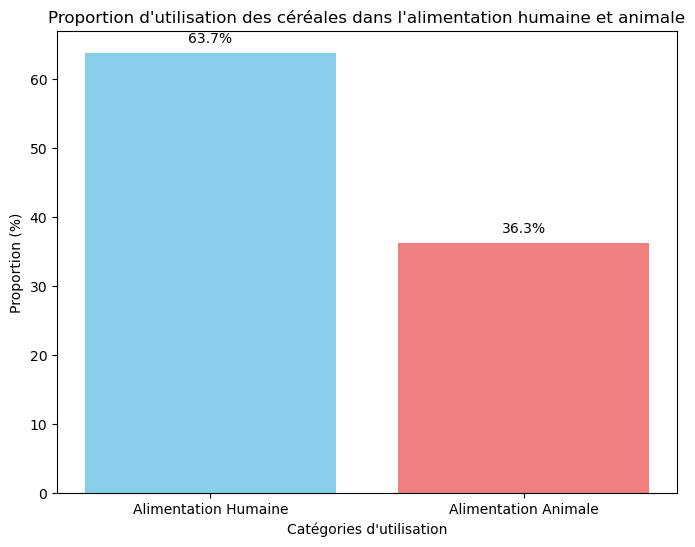

In [58]:
# Les données que vous avez calculées
proportion_alimentation_animale = proportion_alimentation_animale  # La proportion d'alimentation animale que vous avez calculée
proportion_alimentation_humaine = 100 - proportion_alimentation_animale  # Complément à 100%

# Catégories pour le graphique à barres empilées
categories = ['Alimentation Humaine', 'Alimentation Animale']

# Données pour les deux catégories
data = [proportion_alimentation_humaine, proportion_alimentation_animale]

# Créer le graphique à barres empilées
plt.figure(figsize=(8, 6))
plt.bar(categories, data, color=['skyblue', 'lightcoral'])
plt.xlabel('Catégories d\'utilisation')
plt.ylabel('Proportion (%)')
plt.title('Proportion d\'utilisation des céréales dans l\'alimentation humaine et animale')

# Afficher les pourcentages au-dessus des barres
for i in range(len(categories)):
    plt.text(i, data[i] + 1, f'{data[i]:.1f}%', ha='center', va='bottom')

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [59]:
result_2017['proportion']=result_2017['Sous_nutrition']/result_2017['Population']*100


C:\Users\roulh\AppData\Local\Temp\ipykernel_21608\249701153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_2017['proportion']=result_2017['Sous_nutrition']/result_2017['Population']*100


In [60]:
result_2017[['Zone','proportion']].sort_values(by='proportion', ascending=False).head(10)

,Zone,proportion
472,Haïti,48.259182
946,République populaire démocratique de Corée,47.188685
652,Madagascar,41.062924
622,Libéria,38.279742
604,Lesotho,38.249438
1096,Tchad,37.957606
964,Rwanda,35.055619
730,Mozambique,32.810898
1108,Timor-Leste,32.173531
4,Afghanistan,28.928718


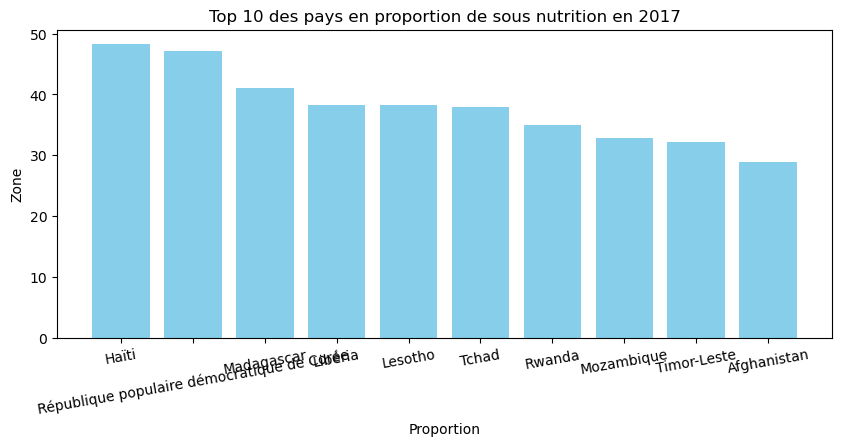

In [61]:
# Les données que vous avez extraites et triées
data = result_2017[['Zone', 'proportion']].sort_values(by='proportion', ascending=False).head(10)

# Créer un graphique à barres pour afficher les proportions
plt.figure(figsize=(10, 4))
plt.bar(data['Zone'], data['proportion'], color='skyblue')
plt.xlabel('Proportion')
plt.ylabel('Zone')
plt.title('Top 10 des pays en proportion de sous nutrition en 2017')
plt.xticks(rotation=10)  # Rotation des étiquettes pour une meilleure lisibilité

# Afficher le graphique
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [62]:
# Fusionner les DataFrames aide_alimentaire et population par la colonne 'Zone'
aide_al_pop = aide_alimentaire[['Zone','Valeur']].groupby('Zone').sum()


In [63]:
aide_al_pop10=aide_al_pop.sort_values(by='Valeur',ascending=False).head(10)
aide_al_pop10

,Valeur
Zone,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [64]:
#Lister les 5 pays
list_pays=list(aide_al_pop10.index[:5])
list_pays

['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

In [65]:
aide_5_pays=aide_alimentaire[['Zone','Année','Valeur']].groupby(['Zone','Année']).sum().reset_index()

In [66]:
aide_5_pays=aide_5_pays[aide_5_pays['Zone'].isin(list_pays)]

In [67]:
aide_5_pays

,Zone,Année,Valeur
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


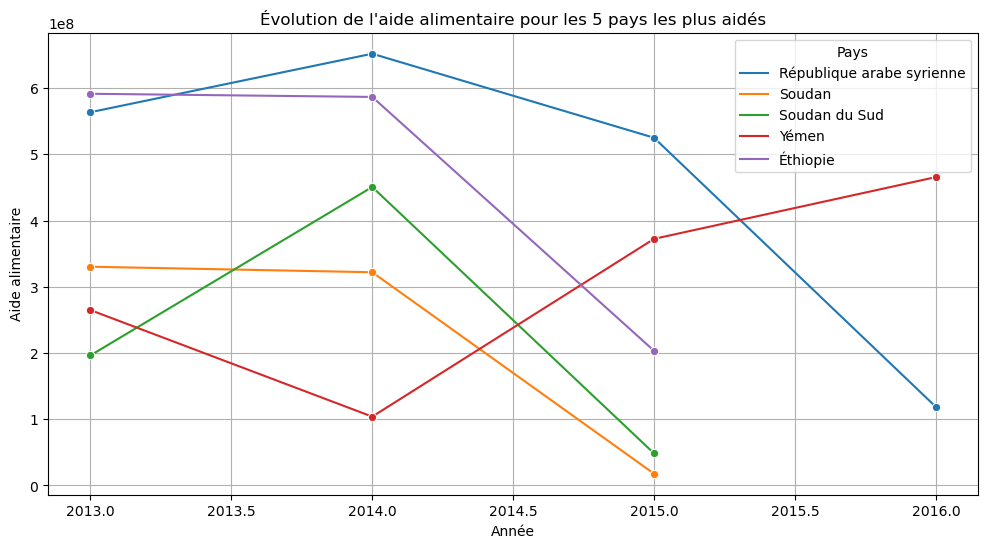

In [68]:
import seaborn as sns
plt.figure(figsize=(12, 6))  # Définir la taille du graphique
sns.lineplot(data=aide_5_pays, x='Année', y='Valeur', hue='Zone', marker='o')

plt.xlabel('Année')  # Étiquette de l'axe des x
plt.ylabel('Aide alimentaire')  # Étiquette de l'axe des y
plt.title('Évolution de l\'aide alimentaire pour les 5 pays les plus aidés')  # Titre du graphique
plt.legend(title='Pays')  # Légende avec les noms des pays
plt.grid(True)  # Activer la grille en arrière-plan
plt.show()  # Afficher le graphique

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [69]:
dispo_alimentaire_pays_total=dispo_alimentaire[['Zone','Produit','Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum()

C:\Users\roulh\AppData\Local\Temp\ipykernel_21608\2144949591.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dispo_alimentaire_pays_total=dispo_alimentaire[['Zone','Produit','Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum()


In [70]:
dispo_alimentaire_10_plus_faible=dispo_alimentaire_pays_total.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True).head(10).reset_index()
dispo_alimentaire_10_plus_faible

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,République centrafricaine,1879.0
1,Zambie,1924.0
2,Madagascar,2056.0
3,Afghanistan,2087.0
4,Haïti,2089.0
5,République populaire démocratique de Corée,2093.0
6,Tchad,2109.0
7,Zimbabwe,2113.0
8,Ouganda,2126.0
9,Timor-Leste,2129.0


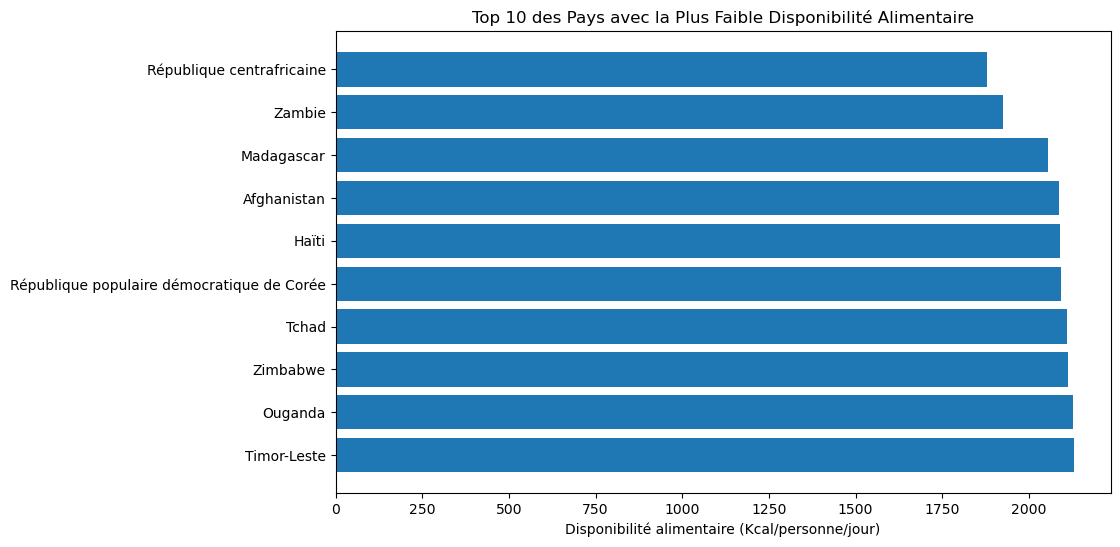

In [71]:
# Créez un podium sous forme de graphique à barres horizontal
plt.figure(figsize=(10, 6))
plt.barh(dispo_alimentaire_10_plus_faible['Zone'], dispo_alimentaire_10_plus_faible['Disponibilité alimentaire (Kcal/personne/jour)'])
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.title('Top 10 des Pays avec la Plus Faible Disponibilité Alimentaire')
plt.gca().invert_yaxis()  # Inverser l'axe des y pour afficher le pays le plus alimenté en haut

# Affichez le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [72]:
dispo_alimentaire_top_10=dispo_alimentaire_pays_total.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10).reset_index()
dispo_alimentaire_top_10

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Autriche,3770.0
1,Belgique,3737.0
2,Turquie,3708.0
3,États-Unis d'Amérique,3682.0
4,Israël,3610.0
5,Irlande,3602.0
6,Italie,3578.0
7,Luxembourg,3540.0
8,Égypte,3518.0
9,Allemagne,3503.0


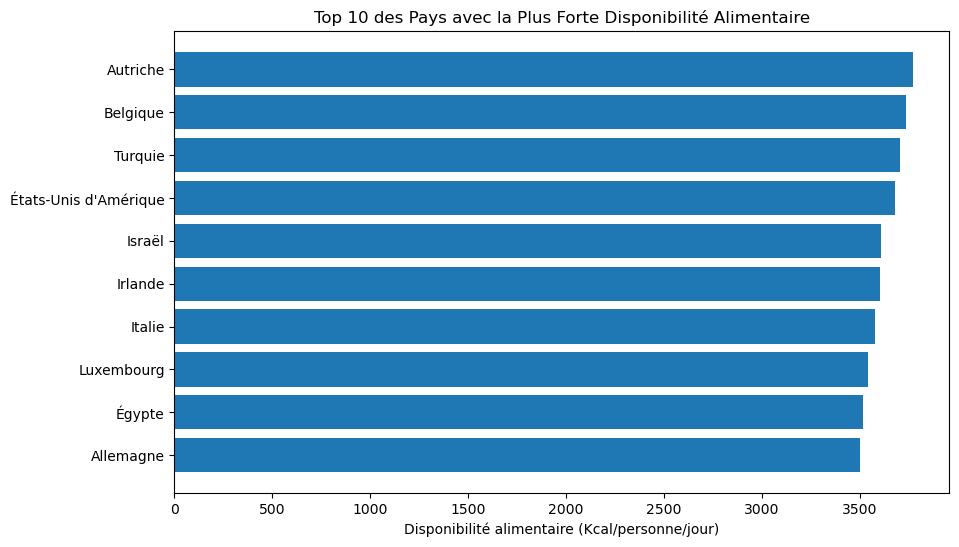

In [73]:
# Créez un podium sous forme de graphique à barres horizontal
plt.figure(figsize=(10, 6))
plt.barh(dispo_alimentaire_top_10['Zone'], dispo_alimentaire_top_10['Disponibilité alimentaire (Kcal/personne/jour)'])
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.title('Top 10 des Pays avec la Plus Forte Disponibilité Alimentaire')
plt.gca().invert_yaxis()  # Inverser l'axe des y pour afficher le pays le plus alimenté en haut

# Affichez le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [74]:
# Création du DataFrame pour la Thaïlande 
data_thai = result_2017[result_2017['Zone']=='Thaïlande']
data_thai

,Zone,Année,Population,Sous_nutrition,proportion
1102,Thaïlande,2017,69209810.0,6200000.0,8.958268


In [75]:
data_thai['Sous_nutrition'].iloc[0]*100/data_thai['Population'].iloc[0]

8.958267621309753

In [76]:
# Filtrer les données de dispo_alimentaire pour la Thaïlande
dispo_thailande = dispo_alimentaire[(dispo_alimentaire['Produit'] == 'Manioc') & (dispo_alimentaire['Zone'] == 'Thaïlande')]

# Calculer la somme des exportations alimentaires en Thaïlande
sum_export=dispo_thailande['Exportations - Quantité'].iloc[0]
production_totale=dispo_thailande['Production'].iloc[0]
prop_export=sum_export*100/production_totale
prop_export

83.41272991928014

In [77]:
# Filtrer les données pour la Thaïlande
dispo_alimentaire_thailande = dispo_alimentaire[dispo_alimentaire['Zone'] == 'Thaïlande']

# Calculer la somme de la disponibilité alimentaire en calories par habitant en Thaïlande
somme_disponibilite_thailande = dispo_alimentaire_thailande['Disponibilité alimentaire (Kcal/personne/jour)'].sum()

# Afficher la somme
print(f"Somme de la disponibilité alimentaire en calories par habitant en Thaïlande : {somme_disponibilite_thailande} Kcal/personne/jour")


Somme de la disponibilité alimentaire en calories par habitant en Thaïlande : 2785.0 Kcal/personne/jour


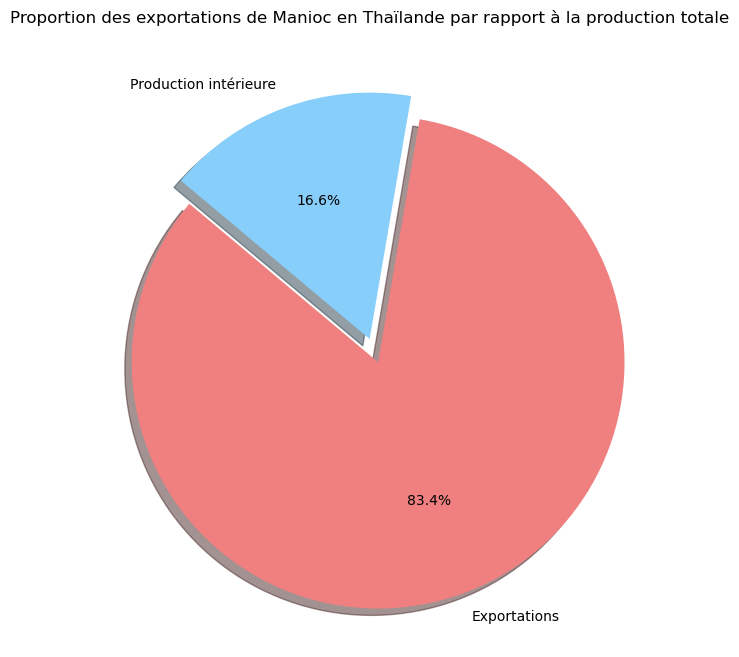

In [78]:
# Étiquettes pour le camembert
labels = ['Exportations', 'Production intérieure']
sizes = [prop_export, 100 - prop_export]  # 100% - proportion d'exportations

# Couleurs des tranches
colors = ['lightcoral', 'lightskyblue']

# Exploser la première tranche (exportations)
explode = (0.1, 0)  # Séparez légèrement la première tranche

# Créez le camembert
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion des exportations de Manioc en Thaïlande par rapport à la production totale')

plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [79]:
# Filtrer les données de dispo_alimentaire pour la République centrafricaine pays ayant peu de disponibilités alimentaires
dispo_rca = dispo_alimentaire[(dispo_alimentaire['Zone'] == 'République centrafricaine')]

# Calculer la somme des importations alimentaires en République centrafricaine
importations_rca = dispo_rca['Importations - Quantité'].sum()

# Calculer la somme totale de la disponibilité alimentaire en République centrafricaine
dispo_totale_rca = dispo_rca['Nourriture'].sum()

# Calculer la proportion des importations en République centrafricaine
proportion_importations_rca = (importations_rca / dispo_totale_rca) * 100

# Afficher la proportion des importations en République centrafricaine
print("Proportion des importations en République centrafricaine par rapport à la disponibilité alimentaire totale : {:.2f}%".format(proportion_importations_rca))


Proportion des importations en République centrafricaine par rapport à la disponibilité alimentaire totale : 3.63%


In [80]:
# Filtrer les données de dispo_alimentaire pour l'Autriche top 1 du pays ayant le plus de disponibilité alimentaire
dispo_autriche = dispo_alimentaire[(dispo_alimentaire['Zone'] == 'Autriche')]

# Calculer la somme des importations alimentaires en Autriche
importations_autriche = dispo_autriche['Importations - Quantité'].sum()

# Calculer la somme totale de la disponibilité alimentaire en autriche
dispo_totale_autriche = dispo_autriche['Nourriture'].sum()

# Calculer la proportion des importations en République centrafricaine
proportion_importations_autriche = (importations_autriche / dispo_totale_autriche) * 100

# Afficher la proportion des importations en République centrafricaine
print("Proportion des importations en Autriche par rapport à la disponibilité alimentaire totale : {:.2f}%".format(proportion_importations_autriche))


Proportion des importations en Autriche par rapport à la disponibilité alimentaire totale : 93.15%


In [81]:
# Filtrer les données de dispo_alimentaire pour le Yémen
dispo_yemen = dispo_alimentaire[(dispo_alimentaire['Zone'] == 'Yémen')]

# Calculer la somme des exportations alimentaires au Yémen
exportations_yemen = dispo_yemen['Exportations - Quantité'].sum()

# Calculer la somme totale de la disponibilité alimentaire au Yémen
dispo_totale_yemen = dispo_yemen['Nourriture'].sum()

# Calculer la proportion des exportations au Yémen
proportion_exportations_yemen = (exportations_yemen / dispo_totale_yemen) * 100

# Afficher la proportion des exportations au Yémen
print("Proportion des exportations au Yémen par rapport à la disponibilité alimentaire totale : {:.2f}%".format(proportion_exportations_yemen))


Proportion des exportations au Yémen par rapport à la disponibilité alimentaire totale : 7.85%


In [82]:
# Filtrer les données de dispo_alimentaire pour le Yémen
dispo_yemen = dispo_alimentaire[(dispo_alimentaire['Zone'] == 'Yémen')]

# Calculer la somme des importations alimentaires au Yémen
importations_yemen = dispo_yemen['Importations - Quantité'].sum()

# Calculer la somme totale de la disponibilité alimentaire au Yémen
dispo_totale_yemen = dispo_yemen['Nourriture'].sum()

# Calculer la proportion des importations en Yémen
proportion_importations_yemen = (importations_yemen / dispo_totale_yemen) * 100

# Afficher la proportion des importations en Yémen
print("Proportion des importations en Yémen par rapport à la disponibilité alimentaire totale : {:.2f}%".format(proportion_importations_yemen))


Proportion des importations en Yémen par rapport à la disponibilité alimentaire totale : 74.07%


In [83]:
# Filtrer les données de dispo_alimentaire pour Israël
dispo_israel = dispo_alimentaire[(dispo_alimentaire['Zone'] == 'Israël')]

# Calculer la somme des exportations alimentaires en Israël
exportations_israel = dispo_israel['Exportations - Quantité'].sum()

# Calculer la somme totale de la disponibilité alimentaire en Israël
dispo_totale_israel = dispo_israel['Nourriture'].sum()

# Calculer la proportion des exportations en Israël
proportion_exportations_israel = (exportations_israel / dispo_totale_israel) * 100

# Afficher la proportion des exportations en Israël
print("Proportion des exportations en Israël par rapport à la disponibilité alimentaire totale : {:.2f}%".format(proportion_exportations_israel))


Proportion des exportations en Israël par rapport à la disponibilité alimentaire totale : 23.11%


In [84]:
# Filtrer les données de dispo_alimentaire pour Israël
dispo_israel = dispo_alimentaire[(dispo_alimentaire['Zone'] == 'Israël')]

# Calculer la somme des importations alimentaires en Israël
importations_israel = dispo_israel['Importations - Quantité'].sum()

# Calculer la somme totale de la disponibilité alimentaire en Israël
dispo_totale_israel = dispo_israel['Nourriture'].sum()

# Calculer la proportion des importations en Israël
proportion_importations_israel = (importations_israel / dispo_totale_israel) * 100

# Afficher la proportion des importations en Israël
print("Proportion des importations en Israël par rapport à la disponibilité alimentaire totale : {:.2f}%".format(proportion_importations_israel))


Proportion des importations en Israël par rapport à la disponibilité alimentaire totale : 82.49%


MERCI POUR VOTRE ATTENTION Fahima 